<a href="https://colab.research.google.com/github/GildasTaliah/FinancialTrading/blob/main/ML_BasedStrat_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Stock Return Prediction Leveraging Technical Indicators**

## 01


# **Intro**

Machine Learning (ML) is the science and art of programming computers so they can learn from data.
$\quad$


Machine learning techniques can be classified into three main classes namely:
- supervised learning,
- unsupervised learning and
- Reinforcement learning.

Furthermore,  Supervised learning can be classified into regression and classification techniques.

There are numerous machine learning (ML) techniques that can be used for a variety of tasks, including for regression, classification, and clustering.

Some examples of ML techniques include Linear Rregression, Ridge Regression, Logistic Regression, Support Vector Regression/Classification, Decision Trees Regression/Classification, Gradient Boosting, K-means Clustering etc.

Our focus herein is on the implementation of two types namely:  **Decision Trees and Random Forests**, in predicting the next time market movement.


A typical machine learning process usually starts with:

 - **Data Collection** where the required data is gotten from a credible source be it external or internal.

 - It proceeds to **Data Cleaning** where the data is checked for accuracy; visualization and exploratory data analysis are then carried out.

 - Next, comes **Model Implementation** and **Model Validation**... continuos integration, continuous develeopment.


$\quad$
$\quad$
$\quad$
$\quad$

# **Machine Learning Classification Model**

Supervised ML techniques aims to predicts an output (label) given sets of input (features). In classification problems the output is typically binary or from a fixed set of classifiers. We consider the **decision tree and random forest classifiers** in this study.


**Why Tree Models ?**
Predicting next day market movement such as an: **Up or Down** movement, is a typical classification problem. Thus classifiers such as tree models are ideal.

**How do tree models work ?**


**Decision Trees**:

Decision trees work by breaking a data set down based on it's features, creating a tree like structure to model this data. The algorithm first splits the training set into two subsets using a single feature $K$ and a threshold $t_{k}$. It searches the pair paramters ($K$, $t_{k}$) that produces the purest subsets. (More on these later!)



Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, **ensemble methods** take advantage of the flexibility of trees while reducing their tendency to memorize noise.



**Random Forest :**  

Random forest combines the predictions made by **multiple decision trees** and returns a single outcome. Through a technique known as **bagging or boostrap aggregation**, the model leverages the capabilities of multiple decision trees. For classification the outcome is the **majority class prediction**.

In [80]:
# @title Global imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tickers = ['TSLA', 'MSFT', 'NVDA', 'AMZN', 'META']

In [81]:
# Select Nvidia for case study: Illustratiob
DF = yf.download(tickers[2], auto_adjust= True, interval= '1wk')
DF.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-18,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.036301,0.042869,0.036301,0.040600,1569600000
1999-02-01,0.037854,0.038212,0.033077,0.036301,812688000
1999-02-08,0.039884,0.040122,0.034152,0.038092,631248000
1999-02-15,0.039884,0.042272,0.036063,0.040600,424800000


In [82]:
# drop first level, columns
DF = DF.droplevel(1, axis = 1)
DF.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
1999-01-18,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.036301,0.042869,0.036301,0.040600,1569600000
1999-02-01,0.037854,0.038212,0.033077,0.036301,812688000
1999-02-08,0.039884,0.040122,0.034152,0.038092,631248000
1999-02-15,0.039884,0.042272,0.036063,0.040600,424800000


In [83]:
df_cla = yf.download(tickers[4], auto_adjust= True, interval= '1wk', multi_level_index= False)
df_cla

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2012-05-14,38.084522,44.828761,37.855398,41.889986,573576400
2012-05-21,31.788568,36.520493,30.822260,36.390986,430966300
2012-05-28,27.614515,31.569409,26.727903,31.360207,288826000
2012-06-04,26.996874,27.654362,25.422886,27.096494,203386400
2012-06-11,29.895800,29.985457,26.737863,27.076569,121558000
...,...,...,...,...,...
2024-12-09,619.849976,637.885476,605.681412,623.417105,49130100
2024-12-16,584.778320,631.860339,579.532552,629.472251,104806400
2024-12-23,599.809998,607.989990,586.250000,589.599976,29097500


In [84]:
# View info
df_cla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2012-05-14 to 2025-01-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   661 non-null    float64
 1   High    661 non-null    float64
 2   Low     661 non-null    float64
 3   Open    661 non-null    float64
 4   Volume  661 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 31.0 KB


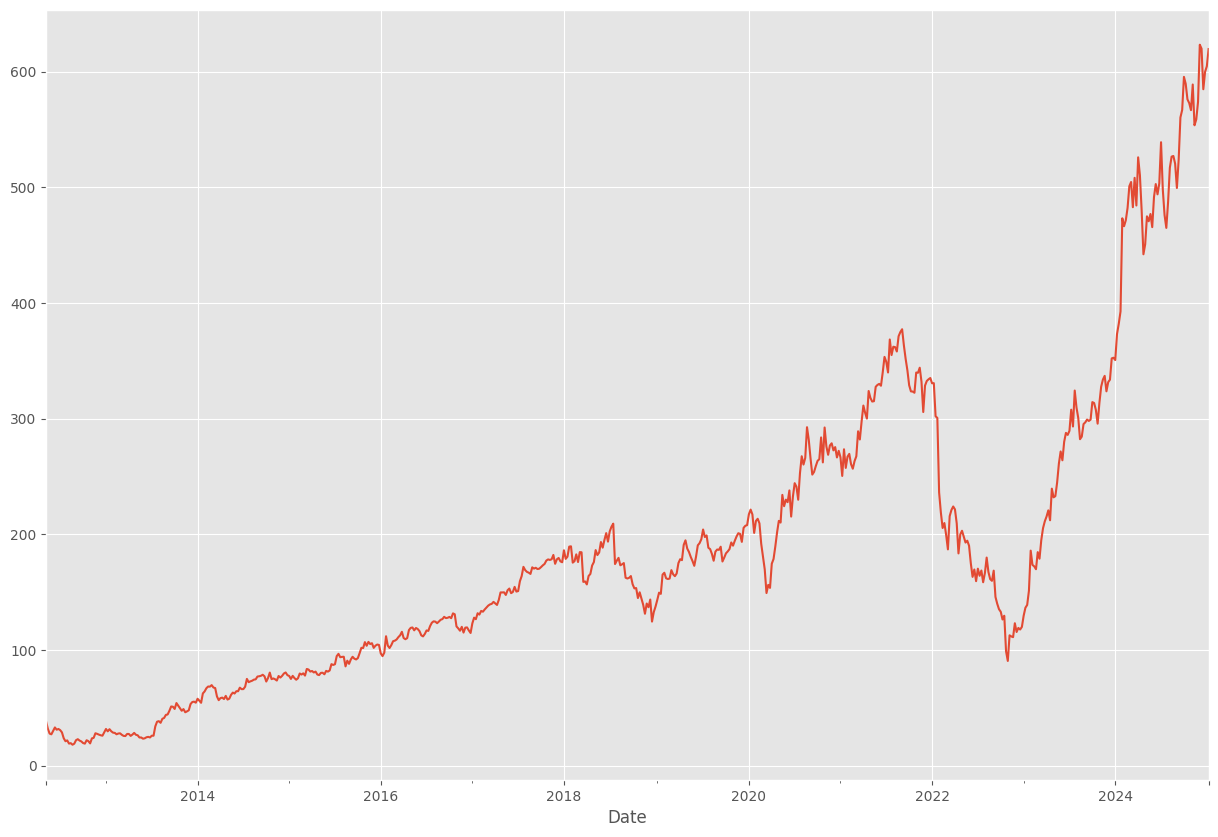

In [85]:
# view stock price evolution
plt.style.use('ggplot')

df_cla.Close.plot(figsize= (15,10))
plt.show()

In [86]:
import plotly.express as px
import plotly.graph_objects as go

# Plot. last 1000 observations
df = df_cla.iloc[-1000:]
fig = go.Figure(data = [go.Candlestick(x = df.index,
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])])
fig.show()

## Data Processiong and Feature Extraction

At this stage we extract features that would be used to predict next day returns movement/direction.

We obtain momentum, volatility and mean reversion indicators. Just afew of then, the goal is mainly illustration.

In [87]:
## Compute returns and extract features

# Percentage returns
df_cla['percent_ret'] = df_cla['Close'].pct_change()  * 100

# Momentum indicators
df_cla['SMA30'] = df_cla['percent_ret'].rolling(30).mean()
df_cla['SMA180'] = df_cla['percent_ret'].rolling(180).mean()

# Volatility Indicator
df_cla['Vol'] =  df_cla['percent_ret'].rolling(30).std()

# Mean Reverting Indicator: distance
df_cla['dist'] = df_cla['Close'] - df_cla['Close'].rolling(30).mean()

# Shift returns one day behind to serve as targets/dependent variable
df_cla['change_tomorrow'] = df_cla['percent_ret'].shift(-1)

# Drop NA values and view first 6 observation.
df_cla.dropna(inplace = True)
df_cla.head(6)

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
Date,,,,,,,,,,,
2015-10-26,101.581970,104.719985,101.163570,101.811091,127642000,-0.215284,0.803291,0.728670,3.407487,13.331082,5.030879
2015-11-02,106.692436,110.228930,100.794966,101.332912,187032700,5.030879,0.951370,0.848461,3.493277,17.609394,-2.941172
2015-11-09,103.554428,109.451906,103.434890,106.592825,127675400,-2.941172,0.904525,0.905069,3.536930,13.701991,3.241952
2015-11-16,106.911613,107.469480,100.087681,102.926835,147603100,3.241952,0.981642,0.935506,3.562598,16.202781,-1.742467
2015-11-23,105.048714,107.061031,103.992750,106.782098,64538400,-1.742467,1.027407,0.866170,3.516675,13.461238,0.692283
2015-11-30,105.775948,107.509324,102.956715,105.437237,112055400,0.692283,1.070739,0.813738,3.503818,13.269648,-3.823701


In [88]:
# Descriptive statistics
df_cla.describe().round(4)

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
count,480.0000,480.0000,480.0000,480.0000,4.800000e+02,480.0000,480.0000,480.0000,480.0000,480.0000,480.0000
mean,234.2559,241.3732,225.9614,233.0810,1.081499e+08,0.4932,0.5035,0.4841,4.6049,14.4630,0.4988
std,120.4862,123.9571,116.1007,119.6309,5.884469e+07,4.9297,1.0115,0.2431,1.6666,41.0294,4.9304
min,90.4445,97.6968,87.7548,94.4193,2.909750e+07,-23.6982,-2.6929,-0.2303,1.9469,-124.6658,-23.6982
25%,151.0879,155.8795,146.6149,151.1402,7.023310e+07,-2.0735,0.1674,0.3620,3.4405,-2.3820,-2.0735
50%,188.7938,195.5978,181.5067,187.1501,9.482275e+07,0.5605,0.5711,0.4465,4.4954,12.6575,0.5730
75%,292.6919,304.1033,279.6567,293.2299,1.268801e+08,2.8941,0.9531,0.5717,5.4118,35.0039,2.8941
max,623.2673,637.8855,605.6814,629.4723,5.130330e+08,24.4851,3.9680,1.1482,9.4888,151.4692,24.4851


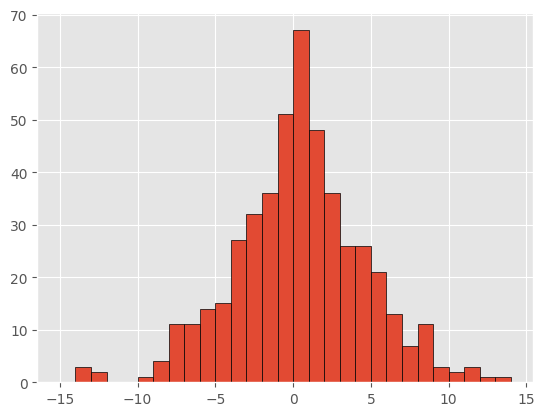

In [89]:
# View histogram
#np.log(1 + df_cla['percent_ret']).hist(bins=range(-15,15), edgecolor='black');
df_cla['percent_ret'].hist(bins=range(-15,15), edgecolor='black');
plt.show()

In [90]:
print(f'Mean : {df_cla.percent_ret.mean():.4f}\n')
print(f'StandDev: {df_cla.percent_ret.std():.4f}\n')

Mean : 0.4932

StandDev: 4.9297



In [91]:
# Obtain labels
df_cla['change_tomorrow'] = np.where( df_cla['change_tomorrow'] < 0, 0, 1)
df_cla
df_cla.head()

,Close,High,Low,Open,Volume,percent_ret,SMA30,SMA180,Vol,dist,change_tomorrow
Date,,,,,,,,,,,
2015-10-26,101.581970,104.719985,101.163570,101.811091,127642000,-0.215284,0.803291,0.728670,3.407487,13.331082,1
2015-11-02,106.692436,110.228930,100.794966,101.332912,187032700,5.030879,0.951370,0.848461,3.493277,17.609394,0
2015-11-09,103.554428,109.451906,103.434890,106.592825,127675400,-2.941172,0.904525,0.905069,3.536930,13.701991,1
2015-11-16,106.911613,107.469480,100.087681,102.926835,147603100,3.241952,0.981642,0.935506,3.562598,16.202781,0
2015-11-23,105.048714,107.061031,103.992750,106.782098,64538400,-1.742467,1.027407,0.866170,3.516675,13.461238,1


In [92]:
print(f' Value Counts : {df_cla.change_tomorrow.value_counts()}')

# Split data, use last 250 weeks data for testing
df_cla_is = df_cla.iloc[:-250]
df_cla_oos = df_cla.iloc[-250:]

 Value Counts : change_tomorrow
1    271
0    209
Name: count, dtype: int64


# Model Development

In here we try to answer the question, how does the algortihm inside the tree model works.

**How exactly does the tree algorithm works ?**

The decision tree is a data structure consisting of **Hierarchical Nodes**. The tree like structure is like this (from top to bottom): First the **Root**, then the **internal Nodes** and lastly the **Leafs**.

The root starts with a single feature (input), splitted into two branches, which results to the **first internal nodes**. Thereafter, at that **depth level** using a single feature, the first internal nodes (each of the two) is then splitted into two at the next depth level,  to result to the **next internal nodes** (morethan 2 at this point) and so on until the **leafs** are gotten, which presents the prediction.

- Thus the **maximum depth** (number of depth levels) equals: the root(1) plus the total levels of internal nodes (say LIN) = 1 + LIN.

The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors.

Moreover, in order to produce the **purest leafs possible**, at each internal node, a tree asks a question involving one feature **f** and a split-point **sp**.

- How then does it know which feature and which split-point to pick?

$$\,$$
(Good question Gildas... )

It does so by maximizing **Information gain! IG** The tree considers that every internal node contains information and aims at maximizing the Information Gain obtained after each split (Gildas answering... ). Consider the case where an (internal) node with N samples is split into a left-node with N-left samples and a right-node with N-right samples.


The information gain **IG** for such split is given by the formula shown here:

$$IG(f, sp) = I(parent) -  \frac{N_{left}}{N} * I(left) - \frac{N_{right}}{N} * I(right)$$

Where:

-  $I(node)$ represents the **impurity of the node**.
- $N$, $\,$ $N_{left}$, $\,$  $N_{right}$,  $\,$  : total number of samples, $\,$  left samples, $\,$  right samples.



$$\,$$
$$\,$$
Another interesting question that may arise in mind here is:
- What criterion is used to measure the impurity of a node?
$$\,$$


Well, there are different criteria one can use among which are the **gini-index, entropy, log loss** for classification models.  See more [see more](https://scikit-learn.org/1.5/modules/tree.html#tree-mathematical-formulation). **squared error, friedman_mse, poisson** for regression task.


As ealier highlighted at each Node, data is splitted based on **f** and **sp** to **maximize the** $IG(node)$.

If $IG(node) = 0$, declare the node a **leaf**. Thus spliting for that particular node ceases. It can also stop based aspects such as maximum depth set, or some other parameter constraint.

Now some ML modelling...

In [93]:
# Obtain target and features
target = df_cla_is.change_tomorrow
explanatory = df_cla_is.drop(columns= ['Close', 'High', 'Low', 'Open', 'Volume', 'percent_ret', 'change_tomorrow'])

target_oos = df_cla_oos.change_tomorrow
explanatory_oos = df_cla_oos.drop(columns= ['Close', 'High', 'Low', 'Open', 'Volume', 'percent_ret', 'change_tomorrow'])

In [94]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit tree model, with max depth 10
model_dt = DecisionTreeClassifier(max_depth= 10, criterion= "gini", random_state= 75)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=10, random_state=75)

In [95]:
# View parameters: DT
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 75,
 'splitter': 'best'}

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Inatsntiate an fit forest model, with max depth 10
model_rf = RandomForestClassifier(max_depth=10, n_estimators= 50, n_jobs = -1,
 oob_score =  True,  criterion= "gini", random_state=75)
model_rf.fit(explanatory, target)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=75)

In [97]:
# View parameters: RF
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 75,
 'verbose': 0,
 'warm_start': False}

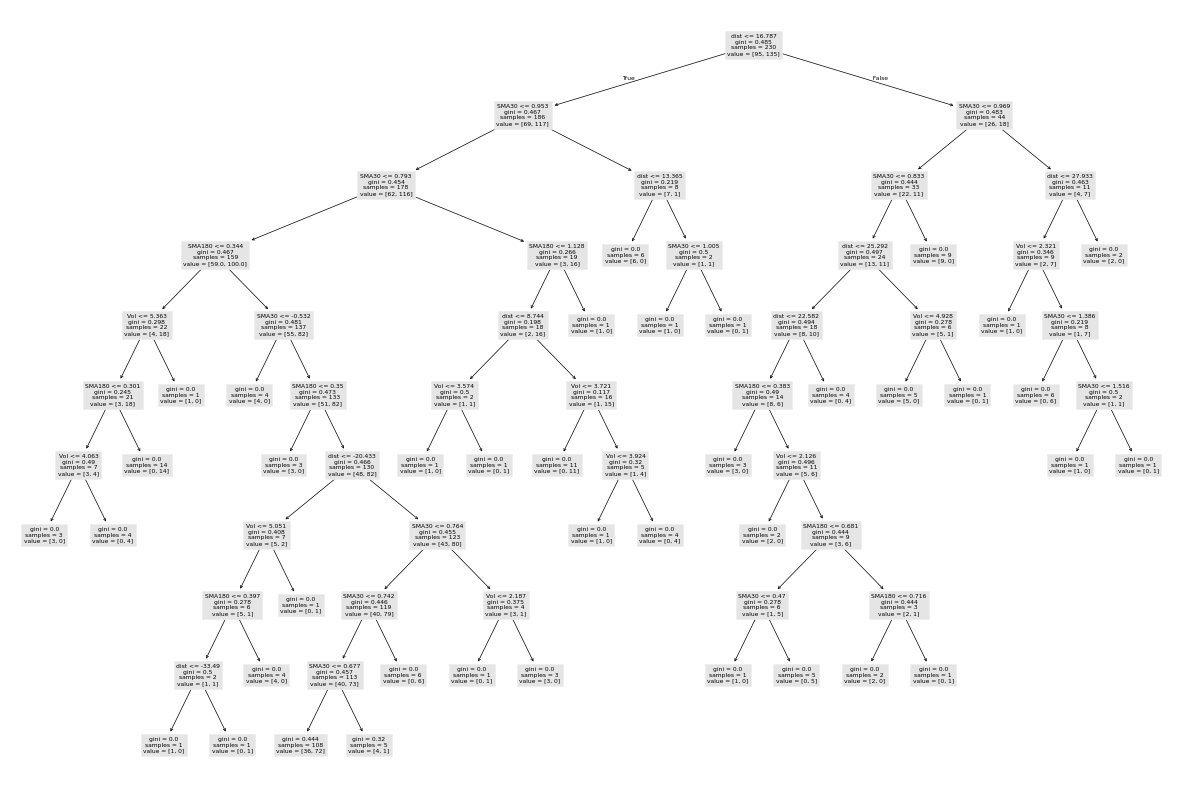

In [98]:
# @title View Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(decision_tree= model_dt, feature_names= model_dt.feature_names_in_)
plt.show()

SMA30     0.359469
Vol       0.240287
dist      0.210064
SMA180    0.190180
dtype: float64 



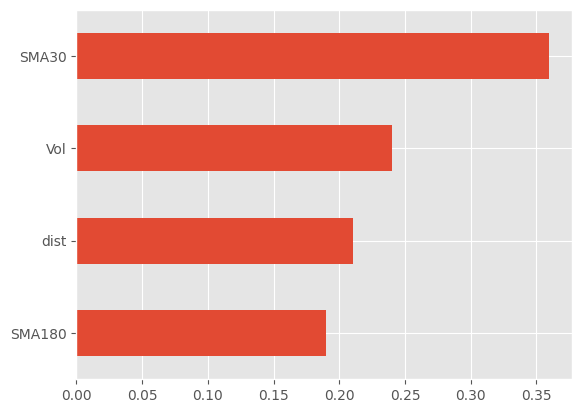

In [99]:
# feature impotance: Decision tree
import pandas as pd
importances = model_dt.feature_importances_
import_dt = pd.Series(importances, index= model_dt.feature_names_in_  )
print(import_dt.nlargest(5), '\n')
import_dt.nsmallest(len(import_dt)).plot(kind= 'barh')
plt.show()

SMA180    0.277365
dist      0.244872
Vol       0.241624
SMA30     0.236139
dtype: float64 



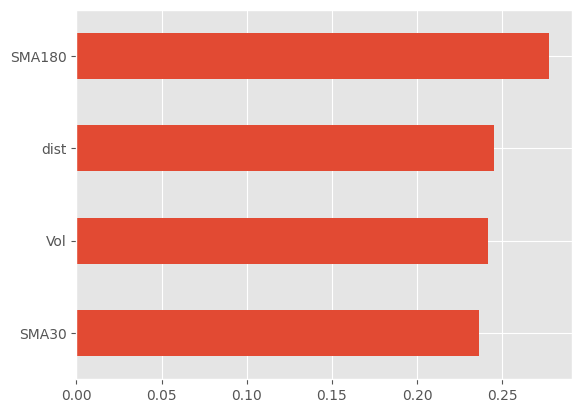

In [100]:
# feature importance: Random Forest
importances = model_rf.feature_importances_
import_rf = pd.Series(importances, index= model_rf.feature_names_in_)
print(import_rf.nlargest(5), '\n')
import_rf.nsmallest(len(import_rf)).plot(kind= 'barh')
plt.show()

In-Sample

In [132]:
# Concat predicted values and actual values in a frame

## DT
y_pred_dt = model_dt.predict(X = explanatory)
df_pred_dt = pd.DataFrame(target)
df_pred_dt['prediction'] = y_pred_dt
print(df_pred_dt.sum())
df_pred_dt.head(6)

change_tomorrow    135
prediction         170
dtype: int64


,change_tomorrow,prediction
Date,,
2015-10-26,1,1
2015-11-02,0,0
2015-11-09,1,1
2015-11-16,0,0
2015-11-23,1,1
2015-11-30,0,0


In [133]:
# RF
y_pred_rf = model_rf.predict(X = explanatory)
df_pred_rf = pd.DataFrame(target)
df_pred_rf['prediction'] = y_pred_rf
print(df_pred_rf.sum())
df_pred_rf.head(6)

change_tomorrow    135
prediction         137
dtype: int64


,change_tomorrow,prediction
Date,,
2015-10-26,1,1
2015-11-02,0,0
2015-11-09,1,1
2015-11-16,0,0
2015-11-23,1,1
2015-11-30,0,0


# Evaluate the model

Model evaluation will be carried out using the **accuracy metric**, a number betweeb 0 and 1. or 0% to 100%, the higher the better.

Typically accuracy of above 85% on the test set is ideal!

In [134]:
# DT
compdt = df_pred_dt.change_tomorrow == df_pred_dt.prediction
print('DT sum', compdt.sum(), '\n')

# RF
comprf = df_pred_rf.change_tomorrow == df_pred_rf.prediction
print('RF sum', comprf.sum(), '\n')
# Length of df
print('Length of data: ', len(comprf))

DT sum 193 

RF sum 228 

Length of data:  230


In [135]:
# Accuracy

## DT
print('DT accuracy: ', compdt.sum() / len(compdt), '\n')
## RF
print('RF accuracy: ', comprf.sum() / len(comprf))

DT accuracy:  0.8391304347826087 

RF accuracy:  0.991304347826087


**Out-sample**

In [136]:
# Concat predicted values and actual values in a frame: Out-Sample

## DT
y_pred_dt = model_dt.predict(X = explanatory_oos)
df_pred_dt = pd.DataFrame(target_oos)
df_pred_dt['prediction'] = y_pred_dt
print(df_pred_dt.sum())
df_pred_dt

change_tomorrow    136
prediction          61
dtype: int64


,change_tomorrow,prediction
Date,,
2020-03-23,0,1
2020-03-30,1,1
2020-04-06,1,1
2020-04-13,1,1
2020-04-20,1,1
...,...,...
2024-12-02,0,0
2024-12-09,0,0
2024-12-16,1,0


In [137]:
# Concat predicted values and actual values in a frame

## RF
y_pred_rf = model_rf.predict(X = explanatory_oos)
df_pred_rf = pd.DataFrame(target_oos)
df_pred_rf['prediction'] = y_pred_rf
print(df_pred_rf.sum())
df_pred_rf

change_tomorrow    136
prediction         132
dtype: int64


,change_tomorrow,prediction
Date,,
2020-03-23,0,1
2020-03-30,1,1
2020-04-06,1,0
2020-04-13,1,1
2020-04-20,1,1
...,...,...
2024-12-02,0,0
2024-12-09,0,0
2024-12-16,1,0


In [138]:
# Evaluate models

# DT
compdt = df_pred_dt.change_tomorrow == df_pred_dt.prediction
print('DT sum', compdt.sum(), '\n')

# RF
comprf = df_pred_rf.change_tomorrow == df_pred_rf.prediction
print('RF sum', comprf.sum(), '\n')
# Length of df
print('Length of data: ', len(comprf))

DT sum 125 

RF sum 118 

Length of data:  250


In [139]:
# Accuracy

## DT
print('DT accuracy: ', compdt.sum() / len(compdt), '\n')
## RF
print('RF accuracy: ', comprf.sum() / len(comprf))

DT accuracy:  0.5 

RF accuracy:  0.472


Test accuracy is very poor and much lower than the trainning accuracy. This implies we have achieved a low training set error and a high test set error. A text book definition of overfitting.

**Overfitting**: When a model overfits the training set, its predictive power on **unseen datasets** is pretty low. The model is said to have clearly memorized the **noise** present in the **training set**.
$$\,$$

## **Strategy logic**
**If our model predicts next day movement to be: 1, we buy! 0 we sell!**

## Bactesting

We use the Python package vectorbt. I am guessing that's short for vectorized bactesting, another name for array programming, which is computationally faster.  


In [109]:
#!pip install vectorbt

In [140]:
# import package for backtest
import vectorbt as vbt

# View version
vbt.__version__

'0.27.1'

In [143]:
# Bactest: DT
bactest_dt = vbt.Portfolio.from_signals(df_cla_oos['Close'], entries= df_pred_dt['prediction'] == 1, exits= df_pred_dt['prediction'] ==0, freq= '1W')
stats_dt = bactest_dt.stats()
stats_dt.to_frame(name='Values')

,Values
Start,2020-03-23 00:00:00
End,2024-12-30 00:00:00
Period,1750 days 00:00:00
Start Value,100.0
End Value,220.541562
Total Return [%],120.541562
Benchmark Return [%],287.103566
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],26.011981


In [144]:
orders_df = bactest_dt.orders.records_readable
pd.concat([orders_df.head(), orders_df.tail()])

,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2020-03-23,0.640232,156.193344,0.0,Buy
1,1,0,2020-05-18,0.640232,234.016068,0.0,Sell
2,2,0,2020-05-25,0.668163,224.233459,0.0,Buy
3,3,0,2020-07-06,0.668163,244.137405,0.0,Sell
4,4,0,2020-07-13,0.676556,241.108978,0.0,Buy
33,33,0,2023-10-30,0.655046,313.402832,0.0,Sell
34,34,0,2023-11-27,0.634436,323.583923,0.0,Buy
35,35,0,2023-12-04,0.634436,331.483765,0.0,Sell
36,36,0,2024-09-02,0.421124,499.390381,0.0,Buy
37,37,0,2024-09-09,0.421124,523.697571,0.0,Sell


In [145]:
# Bactest: RF

bactest_rf = vbt.Portfolio.from_signals(close = df_cla_oos['Close'], entries= df_pred_rf['prediction'] == 1, exits= df_pred_rf['prediction'] ==0, freq= '1W')
stats_rf = bactest_rf.stats()
stats_rf.to_frame(name='Values')

,Values
Start,2020-03-23 00:00:00
End,2024-12-30 00:00:00
Period,1750 days 00:00:00
Start Value,100.0
End Value,159.112216
Total Return [%],59.112216
Benchmark Return [%],287.103566
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],54.929411


In [146]:
orders_rf = bactest_rf.orders.records_readable
pd.concat([orders_rf.head(), orders_rf.tail()])

,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2020-03-23,0.640232,156.193344,0.0,Buy
1,1,0,2020-04-06,0.640232,174.523331,0.0,Sell
2,2,0,2020-04-13,0.625766,178.557907,0.0,Buy
3,3,0,2020-05-04,0.625766,211.541931,0.0,Sell
4,4,0,2020-05-11,0.630128,210.077530,0.0,Buy
55,55,0,2024-10-07,0.289171,589.474548,0.0,Sell
56,56,0,2024-10-14,0.295933,576.005371,0.0,Buy
57,57,0,2024-10-28,0.295933,566.702881,0.0,Sell
58,58,0,2024-11-04,0.284795,588.865051,0.0,Buy
59,59,0,2024-11-18,0.284795,558.689392,0.0,Sell


In [159]:
# plot bactest
bactest_rf.plot().show()
plt.show()

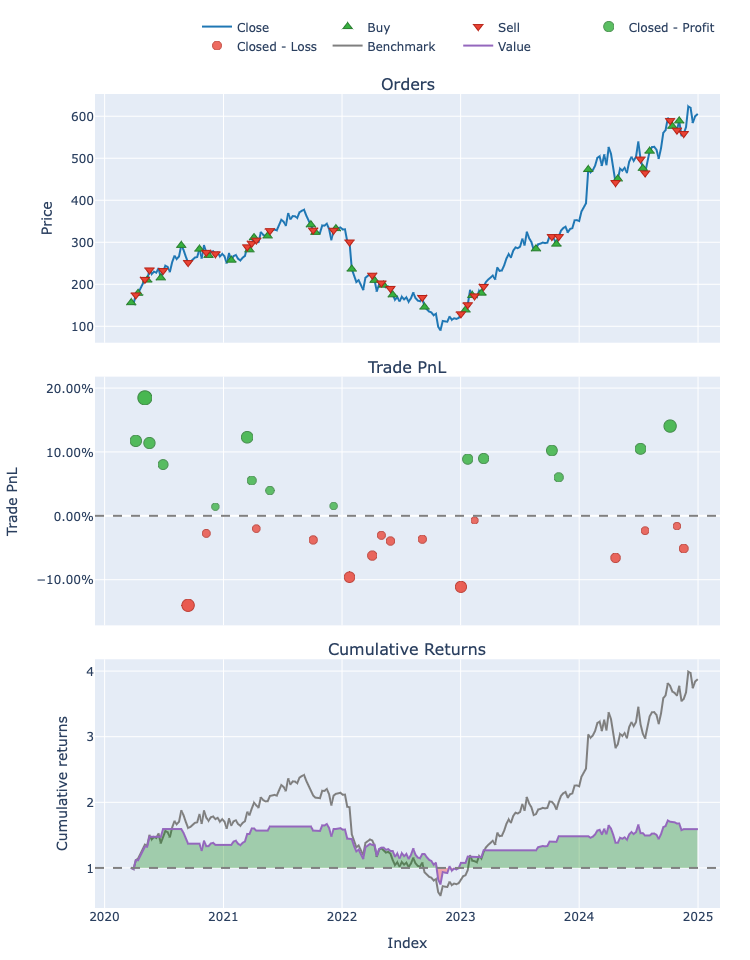

With accuracy of 50% and 47%, obviously our strategy can not perfrom better than the benchmark: buy and hold. This is evident from the performance report and visualization. above.
$\,$

$\quad$


**Now we automate the process** so we can apply to different sets of stocks

Summary of function:
The function above basically implements the above concepts with few additions that are of course easy to see!

In [155]:

from sklearn.metrics import accuracy_score


def ML_ClassfStratBacktest(ticker: str, test_set: int = 52, model: str= 'RF') -> pd.DataFrame:


  # Download history
  DF = yf.download(ticker, auto_adjust= True, interval= '1wk', multi_level_index= False)
  df = pd.DataFrame(DF.Close)


  ## Preprocesing and feature extraction
  # Percentage returns
  df['percent_ret'] = df.pct_change()  * 100

  # Momentum indicators
  df['SMA30'] = df['percent_ret'].rolling(30).mean()
  df['SMA180'] = df['percent_ret'].rolling(180).mean()

  # Volatility Indicator
  df['Vol'] = df['percent_ret'].rolling(30).std()

  # Mean Reverting Indicator: distance
  df['dist'] = df['Close'] - df['Close'].rolling(30).mean()

  df.dropna(inplace = True)

  # Shift returns one day behind to serve as targets/dependent variable
  df['change_tomorrow'] = df['percent_ret'].shift(-1)
  # classify return to 'UP' or 'DOWN', 1 and 0
  df['change_tomorrow'] = np.where( df['change_tomorrow'] > 0, 1, 0)
  print('Stock Symbol: ', ticker)
  print(f' Value Counts : {df.change_tomorrow.value_counts()}', '\n')

  # Split data: In-sample - is, and Out-of-Sample - os
  df_is = df.iloc[:-test_set]
  df_oos = df.iloc[-test_set:]

  # Obtain target and features: In sample
  target_is = df_is.change_tomorrow
  explanatory_is = df_is.drop(columns= ['Close', 'percent_ret', 'change_tomorrow'])

  # Out sample
  target_oos = df_oos.change_tomorrow
  explanatory_oos = df_oos.drop(columns= ['Close', 'percent_ret', 'change_tomorrow'])

  ## Inantiate and fit model, with max depth 10
  if model == 'DT':
    model = DecisionTreeClassifier(max_depth=10, criterion= "gini", random_state= 75)
    model.fit(explanatory_is, target_is)
  elif model == 'RF':
    model = RandomForestClassifier(max_depth=10, n_estimators= 80, criterion= "gini", random_state=75)
    model.fit(explanatory_is, target_is)
  else:
    print('Invalid model: ', model, '. Model must be either RF or DT')


  ## Print In-sample and Out-sample accuracy score
  # Predictions on train and test set
  pred_is = model.predict(explanatory_is)
  pred_oos = model.predict(explanatory_oos)

  res = pd.DataFrame(target_oos)
  res['prediction'] =  pred_oos
  #res = pd.concat([target_oos, pred_oos], axis = 0)

  # print head

  print(pd.concat([res.head(), res.tail()])) #res.head())
  print()


  # Predictions on train set
  print(f'Pred accuracy for: {ticker}')
  # Train score
  print(f'Train accuracy score: {accuracy_score(pred_is, target_is)}')
  # Test score
  print(f'Test accuracy score: {accuracy_score(pred_oos, target_oos)}')
  print()

  # Bactest Result
  # Benchmark Total return
  print(f'Benchmark tot return: {ticker}')
  price = df_oos.Close
  print(price.iloc[-1]/ price.iloc[0] * 100, '\n')


  bactest_results = vbt.Portfolio.from_signals(price, init_cash= 100, \
                    entries = pred_oos == 1, exits= pred_oos == 0, fees = 0.002, freq= '1W')

  print(f'Trad Strat tot return: {ticker}')
  print((bactest_results.total_return() * 100) + 100)
  stats = bactest_results.stats()


  return  stats.to_frame(name= ticker)

In [152]:
# View stock symbols
print(tickers)
print()

['TSLA', 'MSFT', 'NVDA', 'AMZN', 'META']



In [156]:
# Carry out a list comprehension and and save results
result_CLAS = [ML_ClassfStratBacktest(ticker) for ticker in tickers]

[*********************100%***********************]  1 of 1 completed


Stock Symbol:  TSLA
 Value Counts : change_tomorrow
1    320
0    259
Name: count, dtype: int64 

            change_tomorrow  prediction
Date                                   
2024-01-15                0           0
2024-01-22                1           1
2024-01-29                1           1
2024-02-05                1           1
2024-02-12                0           0
2024-12-09                0           0
2024-12-16                1           0
2024-12-23                0           0
2024-12-30                0           0
2025-01-06                0           0

Pred accuracy for: TSLA
Train accuracy score: 0.9829222011385199
Test accuracy score: 0.6538461538461539

Benchmark tot return: TSLA
185.85229314018238 

Trad Strat tot return: TSLA
191.67513585091962


[*********************100%***********************]  1 of 1 completed


Stock Symbol:  MSFT
 Value Counts : change_tomorrow
1    1007
0     840
Name: count, dtype: int64 

            change_tomorrow  prediction
Date                                   
2024-01-15                1           1
2024-01-22                1           0
2024-01-29                1           0
2024-02-05                0           0
2024-02-12                1           0
2024-12-09                0           1
2024-12-16                0           1
2024-12-23                0           1
2024-12-30                0           1
2025-01-06                0           1

Pred accuracy for: MSFT
Train accuracy score: 0.8629526462395544
Test accuracy score: 0.5576923076923077

Benchmark tot return: MSFT
106.52378544418713 

Trad Strat tot return: MSFT
112.29546500911685


[*********************100%***********************]  1 of 1 completed


Stock Symbol:  NVDA
 Value Counts : change_tomorrow
1    637
0    539
Name: count, dtype: int64 

            change_tomorrow  prediction
Date                                   
2024-01-15                1           1
2024-01-22                1           1
2024-01-29                1           0
2024-02-05                1           0
2024-02-12                1           0
2024-12-09                1           1
2024-12-16                1           1
2024-12-23                1           1
2024-12-30                0           1
2025-01-06                0           1

Pred accuracy for: NVDA
Train accuracy score: 0.9306049822064056
Test accuracy score: 0.5

Benchmark tot return: NVDA
235.63183592772862 

Trad Strat tot return: NVDA
204.00707124875308


[*********************100%***********************]  1 of 1 completed


Stock Symbol:  AMZN
 Value Counts : change_tomorrow
1    673
0    591
Name: count, dtype: int64 

            change_tomorrow  prediction
Date                                   
2024-01-15                1           1
2024-01-22                1           1
2024-01-29                1           1
2024-02-05                0           1
2024-02-12                1           1
2024-12-09                0           1
2024-12-16                0           1
2024-12-23                1           1
2024-12-30                0           1
2025-01-06                0           1

Pred accuracy for: AMZN
Train accuracy score: 0.9323432343234324
Test accuracy score: 0.5192307692307693

Benchmark tot return: AMZN
142.98313753479493 

Trad Strat tot return: AMZN
130.62004722483954


[*********************100%***********************]  1 of 1 completed


Stock Symbol:  META
 Value Counts : change_tomorrow
1    271
0    210
Name: count, dtype: int64 

            change_tomorrow  prediction
Date                                   
2024-01-15                1           1
2024-01-22                1           0
2024-01-29                0           0
2024-02-05                1           0
2024-02-12                1           0
2024-12-09                0           0
2024-12-16                1           1
2024-12-23                1           0
2024-12-30                1           1
2025-01-06                0           0

Pred accuracy for: META
Train accuracy score: 0.9766899766899767
Test accuracy score: 0.6346153846153846

Benchmark tot return: META
161.75518947076776 

Trad Strat tot return: META
142.98428360081775


Results are out, accuracies are quite low. Significantly lower than tasty 80% accuracy. Thus our model needs reinforcement.

Clearly we are facing the problem of overfitting. To fix this we can reduce the **maximum-tree-depth and/or increase the maximum-samples-per-leaf**.

Additionally, we may also **gather more data to train model**. also adding more relevant features and performing a proper hyperparameter tuning/optimization can help.

 Moreover, the model was trained only once and used for a whole year, inpractical right?  To improve prediction, we can utilize **an anchored walk-forward bactesting** approach to update model parameters considering continuously changing nature of market regimes and/or non-linearity in features.

(A lot to try hein!..)
We try that in the future.

In [157]:
# @title Out-sample Results from ML Classification Model
pd.concat(result_CLAS, axis = 1)

,TSLA,MSFT,NVDA,AMZN,META
Start,2024-01-15 00:00:00,2024-01-15 00:00:00,2024-01-15 00:00:00,2024-01-15 00:00:00,2024-01-15 00:00:00
End,2025-01-06 00:00:00,2025-01-06 00:00:00,2025-01-06 00:00:00,2025-01-06 00:00:00,2025-01-06 00:00:00
Period,364 days 00:00:00,364 days 00:00:00,364 days 00:00:00,364 days 00:00:00,364 days 00:00:00
Start Value,100.0,100.0,100.0,100.0,100.0
End Value,191.675136,112.295465,204.007071,130.620047,142.984284
Total Return [%],91.675136,12.295465,104.007071,30.620047,42.984284
Benchmark Return [%],85.852293,6.523785,135.631836,42.983138,61.755189
Max Gross Exposure [%],100.0,100.0,100.0,100.0,100.0
Total Fees Paid,2.200941,2.716002,3.841576,0.639169,6.036248
Max Drawdown [%],27.577729,8.879765,14.028027,16.529999,5.982972


- add more features, perform parameter tuning ti improve result.

 $\,$
 Results depicts most asset did not perform better than benchmark, except Tesla and Microsoft.





In [ ]:
# The End!

# References
- DataCamp Course: ML Times Series Models: (https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python) $\,$ $\,$ $\,$

- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O'Reilly Media.
- My DataCamp Profile: https://www.datacamp.com/portfolio/taliahgildas

- Vectorbt Documentation: https://vectorbt.dev/
